In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
env =  pd.read_excel("Grid.xlsx" , header = None).to_numpy()
env_rows = env.shape[0]
env_cols = env.shape[1]
actions = ['up', 'right']
q_table = np.zeros((env_rows, env_cols, len(actions)))
start = (29,0)
end = (0, 29)
epsilon = 0.05
discount_factor = 0.9
learning_rate = 0.05
n_runs = 1000

In [ ]:
def get_next_location(row, col, action):
    new_row = row
    new_col = col
    if actions[action] == 'up' and row > 0:
        new_row -= 1
    elif actions[action] == 'right' and col < env_cols - 1:
        new_col += 1
    return new_row, new_col

In [ ]:
#TRAIN
for episode in range(n_runs):
  row, col = start
  while not (row == end[0]  and col == end[1]):
    if np.random.uniform(0,1) < epsilon:
        action =  np.argmax(q_table[row, col])
    else:
        action =  np.random.randint(len(actions))

    old_row, old_col = row, col
    row, col = get_next_location(row, col, action)

    reward = env[row, col]
    old_q_value = q_table[old_row, old_col, action]
    temporal_difference = reward + (discount_factor * np.max(q_table[row, col])) - old_q_value

    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_table[old_row, old_col, action] = new_q_value


In [ ]:
##GET BEST DIRECTIONS
armax = np.argmax(q_table,axis=2)
directions = []
direction_slice = []
for j in range(1,armax.shape[1]):
    direction_slice.append('right')
direction_slice.append('finish')
directions.append(direction_slice)
for i in range(1,armax.shape[0]):
    direction_slice = []
    for j in range(armax.shape[1]-1):
        if armax[i,j] == 0:
            direction_slice.append('up')
        else:
            direction_slice.append('right')
    direction_slice.append('up')
    directions.append(direction_slice)

#CREATE WAYS MATRIX
way = np.zeros(np.array(directions).shape,dtype='int16')
(x,y) = start
score = 0
while(True):
    way[x,y] = 1
    score = score + env[x,y]
    if (x == end[0] and y == end[1]):
        break
    elif (directions[x][y] == 'right'):
        y = y + 1
    else:
        x = x - 1


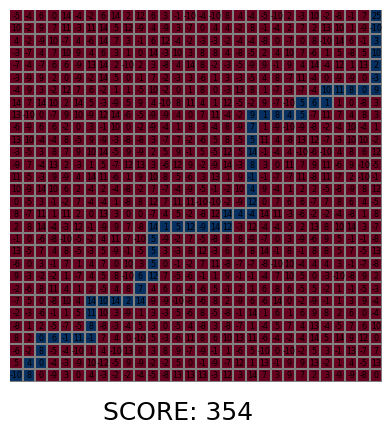

In [ ]:
plt.matshow(way,cmap='RdBu',resample=True)
n = way.shape[0]

plt.hlines(y=np.arange(0, n)+0.5, xmin=np.full(n, 0)-0.5, xmax=np.full(n, n)-0.5, color="gray")
plt.vlines(x=np.arange(0, n)+0.5, ymin=np.full(n, 0)-0.5, ymax=np.full(n, n)-0.5, color="gray")
plt.axis('off')
for (i, j), z in np.ndenumerate(env):
    plt.text(j, i, '{:.0f}'.format(z), ha='center', va='center', fontsize='xx-small',color='k')

plt.figtext(0.5, 0.01, f'SCORE: {score}', ha="center", fontsize=18)

plt.show()